In [ ]:
 import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
import sklearn
import os, sys
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
df = pd.read_csv('/content/drive/MyDrive/parkinsons.data')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


To explain correlation-
Suppose mathematical equation -ax1+bx2+f 
now , if the two co-efficients a and b are correlated , then the two cann be represented in terms of a correlation coefficient "r" , such that one is represented in terms of the other.

In [ ]:
#finding correlation
#the amount of change in one feature in correspondence to another feature
correlation=df.corr()
correlation

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


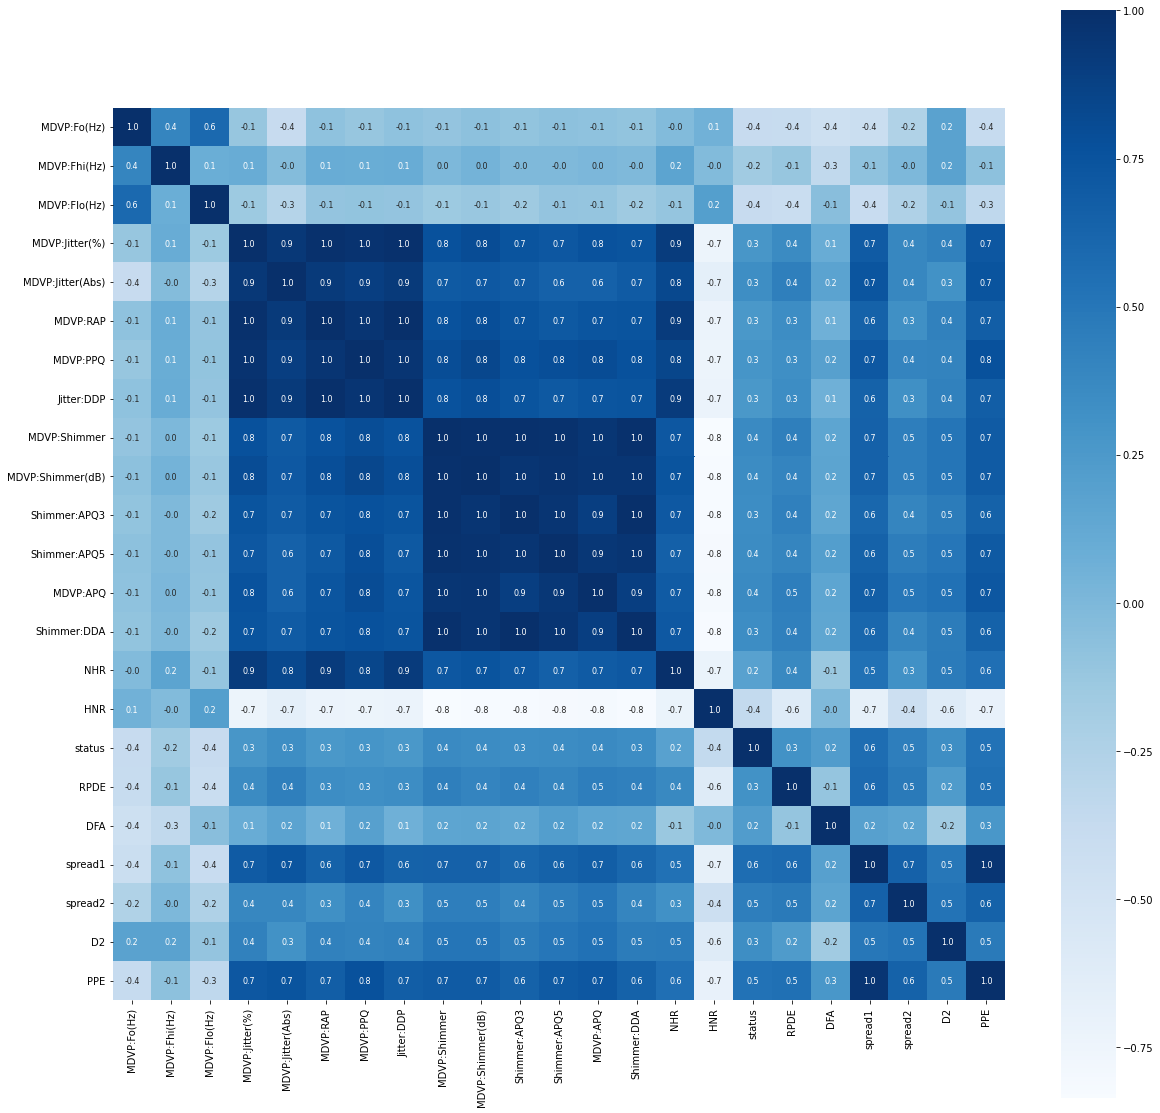

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [ ]:
df.shape

(195, 24)

In [ ]:
#Attribute information
#Matrix column entries(attributes)
#name-ASCII subject name and recording number
#MDVP:Fo(Hz)*-Average vocal fundamental frequency
#MDVP:Fhi(Hz)-Maximum vocal fundamental frequency
#MDVP:Jitter(%),MDVP:RAP,MDVP:PPQ,Jitter:DDP-Several measures of variation in fundamental frequency
#*NHR,HNR*-Two measures of ratio of noise to tonal components in voice
#status-Health status of the subject (one)-Parkinson's , (zero)-healthy
#RPDE,D2-Two nonlinear dynamicalcomplexity measures
#DFA-Signal fractal scaling exponent
#spread1,spread2,PPE-Three nonlinear measures of fundamnetal frequency variation



In [ ]:
#find nul values in the dataset
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [ ]:
df.dtypes
#finding the datatypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [ ]:
#finding the unique values in the columns
for i in df.columns:
    print("********************************************",i,"***************************************")
    print()
    print(set(df[i].tolist()))
    print()
    #upon printing we'll get all the unique values as we have converted the dataset into a set

******************************************** name ***************************************

{'phon_R01_S22_2', 'phon_R01_S07_5', 'phon_R01_S22_3', 'phon_R01_S20_4', 'phon_R01_S26_4', 'phon_R01_S43_5', 'phon_R01_S21_2', 'phon_R01_S25_3', 'phon_R01_S32_3', 'phon_R01_S37_3', 'phon_R01_S05_4', 'phon_R01_S17_1', 'phon_R01_S18_1', 'phon_R01_S04_5', 'phon_R01_S43_4', 'phon_R01_S07_1', 'phon_R01_S33_3', 'phon_R01_S19_5', 'phon_R01_S43_3', 'phon_R01_S34_3', 'phon_R01_S21_5', 'phon_R01_S16_3', 'phon_R01_S32_4', 'phon_R01_S20_1', 'phon_R01_S26_3', 'phon_R01_S04_3', 'phon_R01_S31_1', 'phon_R01_S31_6', 'phon_R01_S37_6', 'phon_R01_S39_2', 'phon_R01_S44_2', 'phon_R01_S37_1', 'phon_R01_S24_6', 'phon_R01_S24_2', 'phon_R01_S21_4', 'phon_R01_S16_6', 'phon_R01_S01_4', 'phon_R01_S39_4', 'phon_R01_S49_6', 'phon_R01_S02_3', 'phon_R01_S42_1', 'phon_R01_S49_2', 'phon_R01_S50_3', 'phon_R01_S07_4', 'phon_R01_S50_2', 'phon_R01_S42_3', 'phon_R01_S50_1', 'phon_R01_S04_4', 'phon_R01_S18_4', 'phon_R01_S35_4', 'phon_R0

AxesSubplot(0.125,0.125;0.775x0.755)


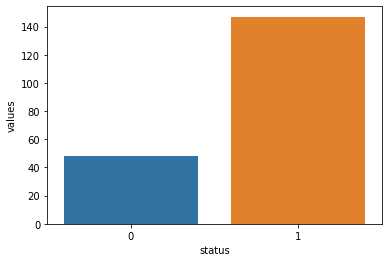

In [ ]:
#now we will check the label imbalance 
temp=df["status"].value_counts()
temp_df=pd.DataFrame({'status':temp.index,'values':temp.values})
print(sns.barplot(x='status',y="values",data=temp_df))
#the people suffering fro parkinson's is more than the number of people not suffering
#model imbalance happens nd the values that are supposed to be 0 will come out to be 1


In [ ]:
#sns.pairplot(df)
#this gives a rough distribution of data with other attributes as well

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


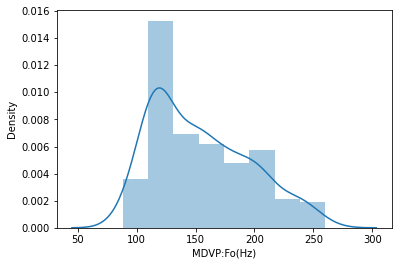

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


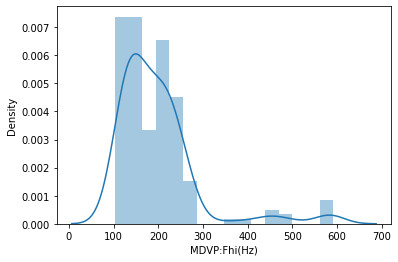

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


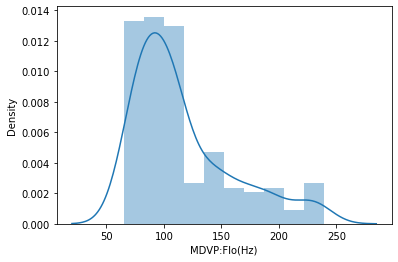

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


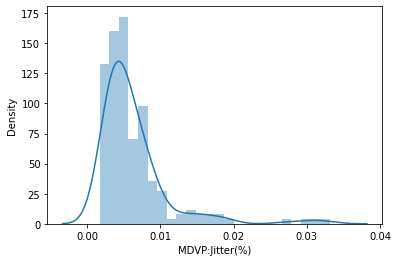

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


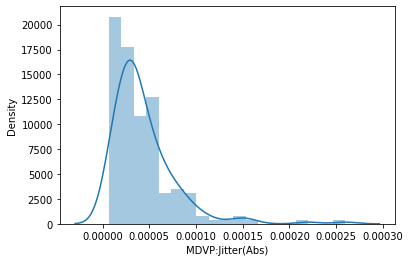

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


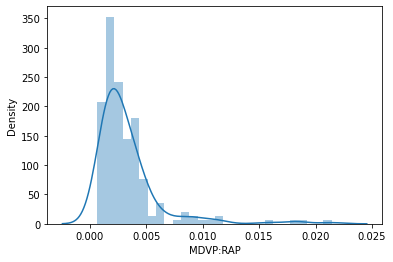

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


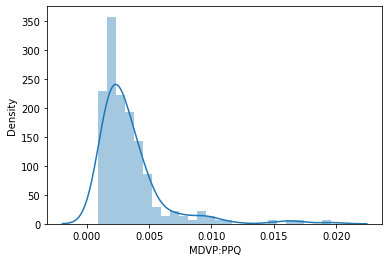

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


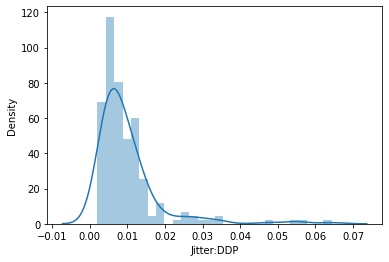

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


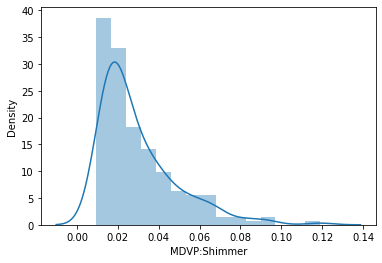

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


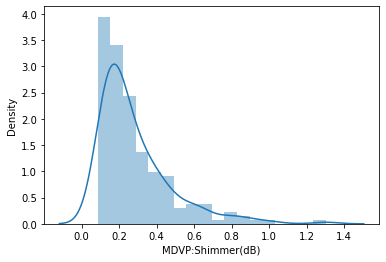

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


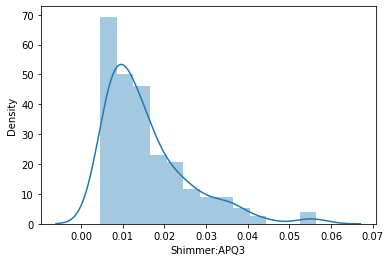

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


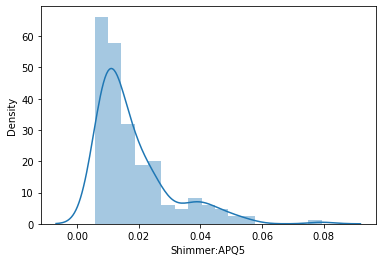

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


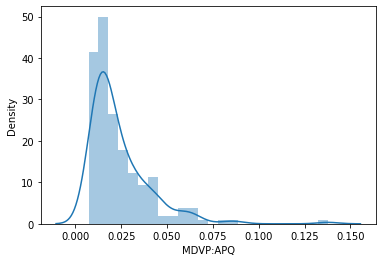

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


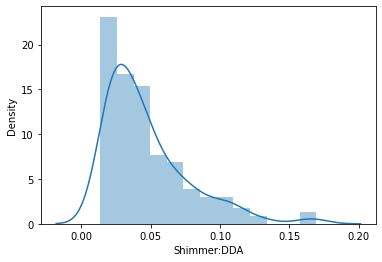

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


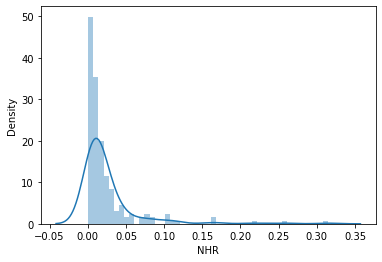

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


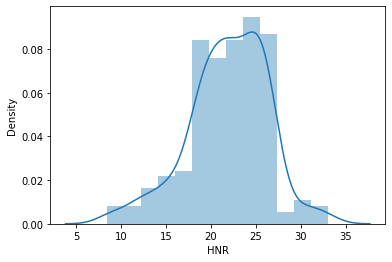

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


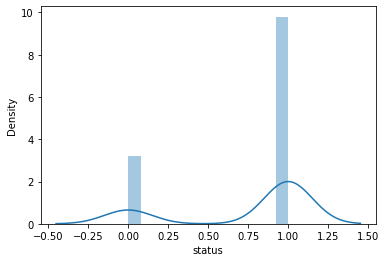

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


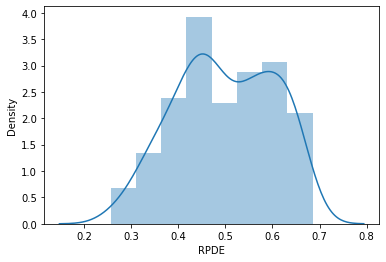

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


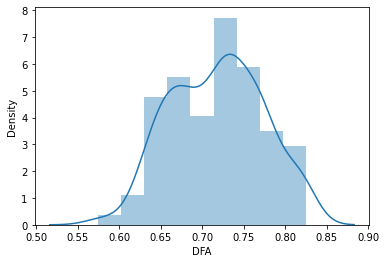

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


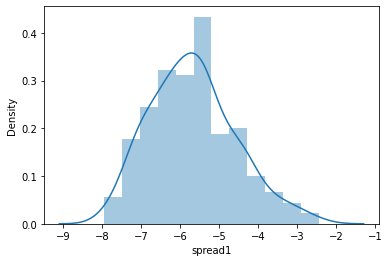

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


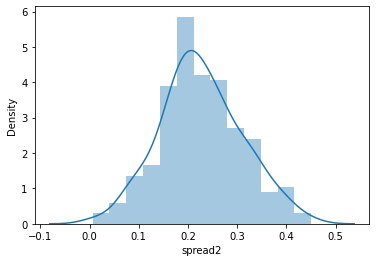

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


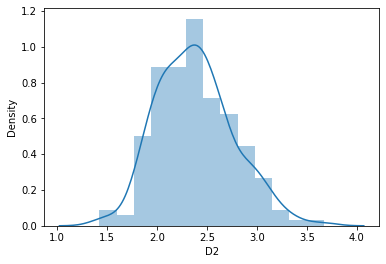

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


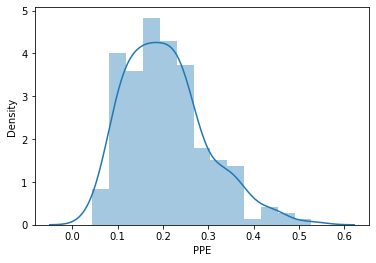

In [ ]:
#find the distribution of numerical columns
def distplots(col):
    sns.distplot(df[col])
    plt.show()
for i in list(df.columns)[1:]:     #removed the first part as it is ID #rather than taking each column one by one , we will traverse
    distplots(i)

In [ ]:
#To make sure that the ML model is applicable for the entire population
#for that to happen , according t Central Limit Theorem 
#We need to make sure that the sample data is normally distributed
#All the columns plotted above are normally distributed , there is some distortion , but in general they follow gaussian law

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


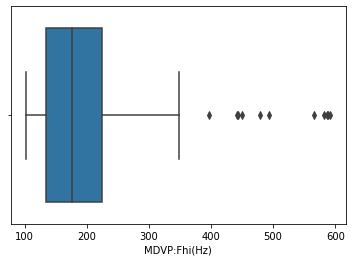

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


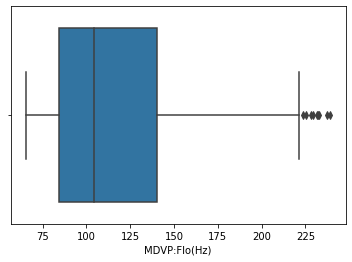

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


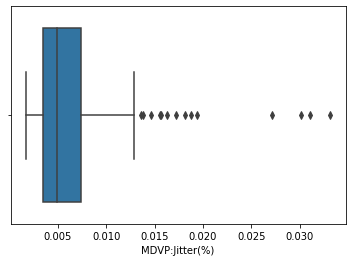

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


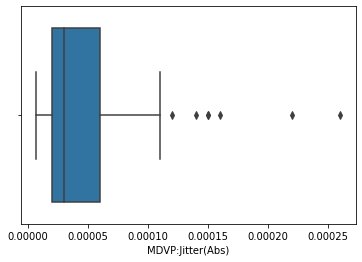

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


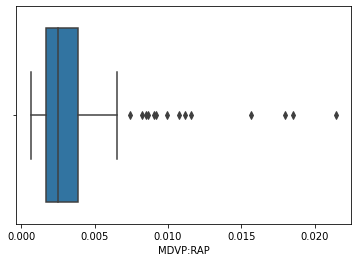

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


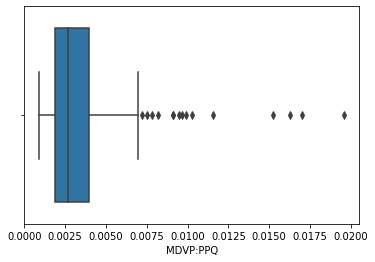

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


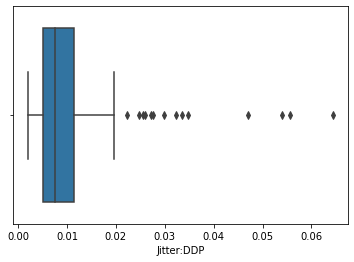

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


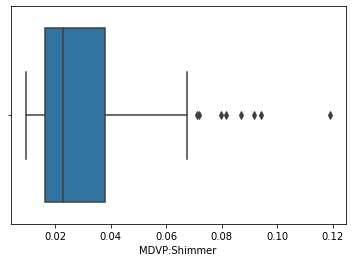

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


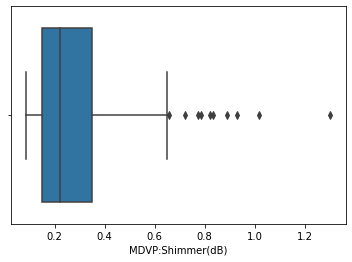

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


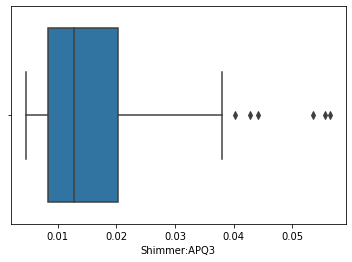

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


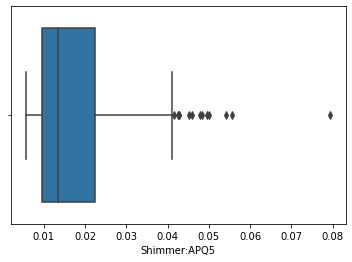

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


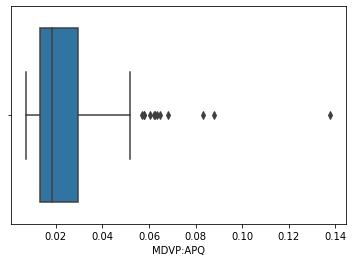

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


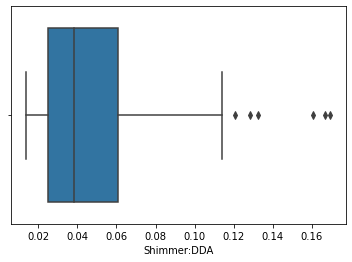

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


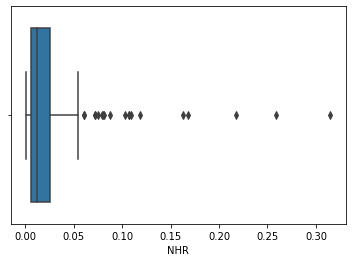

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


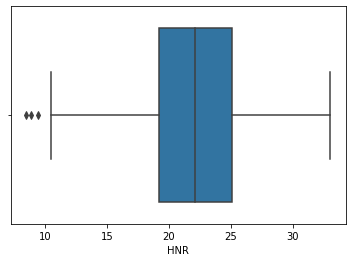

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


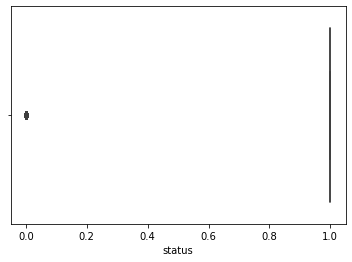

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


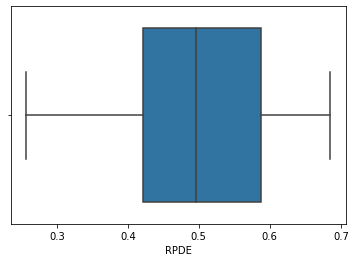

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


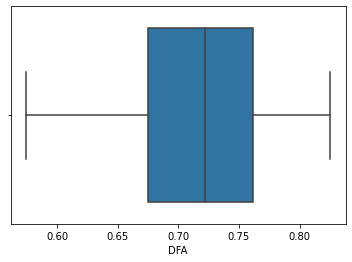

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


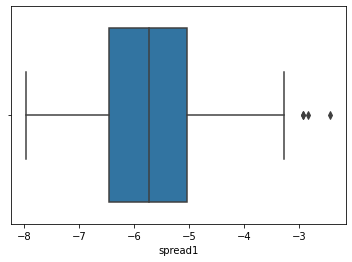

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


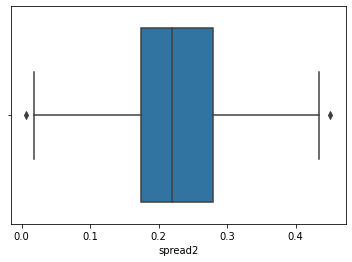

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


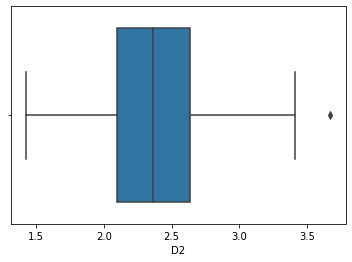

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


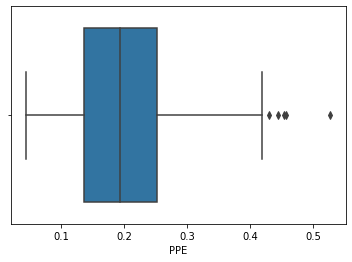

In [ ]:
#Detection and removal of outliers
#best method is to use outliers
#It detectes the median , Q1 , Q3 , Minimum and maximum value
def boxplots(col):
    sns.boxplot(df[col])
    plt.show()
for i in list(df.select_dtypes(exclude=["object"]).columns)[1:]:   #we used this command to exclude objects
    boxplots(i)

In [ ]:
!pip install imblearn --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#drop the column name-as it is an ID column, since it is ID it will be unique for different patients , hence no need of in model
x=df.drop(["status","name"],axis=1)
y=df["status"]

In [ ]:
#to fix the label imbalance that happened in the upper code snippet
#Over sampling-We use k-means clustering , it creates a set of points around 0 
#Under sampler-It will reduce the number of ones
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from  collections import Counter
print((Counter(y)))

Counter({1: 147, 0: 48})


In [ ]:
ros=RandomOverSampler()    #calling the random oversample object
X_ros,y_ros=ros.fit_resample(x,y)     #fitting x and y in randomoversampler
print(Counter(y_ros))

Counter({1: 147, 0: 147})


In [ ]:
#Initialising the MinMaxScaler and scaling the features between -1 and 1 to normalise them.
#The MinMaxScaler transforms features by scaling them to a given range.
#The fit_transform() method fits to the data and then transforms it. Scaling of labels is not required. 
#Scaling is desirable as it brings the data in a certain interval , which ensures that there is no overfit
scaler = MinMaxScaler((-1,1))        #fixes the data in between given intervals
x=scaler.fit_transform(X_ros)        
y=y_ros

PCA is used in our code , we have some specific amount of variance retain. Mean the data we have should retain (let's say 90%) of the variance.

In [ ]:
#Applying Feature Engineering
#Applying PCA-used to represent a multivariate data table as smaller set of variables
#helps in observing trends and outliers.
#The component parameter = 0.95
from sklearn.decomposition import PCA

pca=PCA(.95)
X_PCA=pca.fit_transform(x)

print(x.shape)    #original dataset as 22 columns
print(X_PCA.shape)  #after applying PCA we get 8 columns , which means to retain 95% of variance 8 columns are needed
#reduce dimensionality,saves computing time

(294, 22)
(294, 8)


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X_PCA,y,test_size=0.2,random_state=7)   #test and train split. train size=80% ,testing data=20%

In next steps , we will feed the taken data into algorithms and find out which one works the best

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

list_met=[]           #names of the methods
list_accuracy=[]      #will contain the accuracy value

#Applying all the Algorithms

#Apply Logistic Regression


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier=LogisticRegression(C=0.4,max_iter=1000,solver='liblinear')
lr=classifier.fit(x_train,y_train)



In [ ]:
#Prediction
y_pred=classifier.predict(x_test)

In [ ]:
#Accuracy
accuracy_LR=accuracy_score(y_test,y_pred)

Decision Tree


In [ ]:
#apply Decision Tree
from sklearn.tree import DecisionTreeClassifier
classifier2=DecisionTreeClassifier(random_state=14)
dt=classifier2.fit(x_train,y_train)
#prediction
y_pred2=classifier2.predict(x_test)
#Accuracy
accuracy_DT=accuracy_score(y_test,y_pred2)


In [ ]:
pred_final=[]

In [ ]:
#(236.20000,244.66300,102.13700,0.00277,0.00001,0.00154,0.00153,0.00462,0.02448,0.21700,0.01410,0.01426,0.01621,0.04231,0.00620,24.07800)-Data of person without parkinsons

#(176.17000,185.60400,0.00218,0.00616,0.01851,0.16800,0.341435,0.783626,-6.006414,163.56400,0.00369,0.00002,0.00205,0.196371,2.536527,25)-Data of person with parkinsons

In [ ]:
input_data=(176.17000,185.60400,0.00218,0.00616,0.01851,0.16800,0.341435,0.783626,-6.006414,163.56400,0.00369,0.00002,0.00205,0.196371,2.536527,25)
#taking the data of one patient to test run the code
input_data_np=np.asarray(input_data)       #converting this data into a numpy array
input_data_re=input_data_np.reshape(2,8)#reshaping the datasets in order to suit the model
s_data=scaler.fit_transform(input_data_re)        #normalising the values
pred=dt.predict(s_data)          #predicting the o/p
print(pred[1])
pred_final.append(pred[1])
#if the patient has parkinson's , output should be 1 otherwise zero

1


In [ ]:
#Apply Random Forest Criteria-information gain
from sklearn.ensemble import RandomForestClassifier
classifier3=RandomForestClassifier(random_state=14)
rfi=classifier3.fit(x_train,y_train)
#Prediction
y_pred3=classifier3.predict(x_test)
#Accuracy
accuracy_RFI=accuracy_score(y_test,y_pred)

In [ ]:
input_data=(176.17000,185.60400,0.00218,0.00616,0.01851,0.16800,0.341435,0.783626,-6.006414,163.56400,0.00369,0.00002,0.00205,0.196371,2.536527,25)
#inputting random data points
input_data_np=np.asarray(input_data)       #converting this data into a numpy array
input_data_re=input_data_np.reshape(2,8)  #reshaping the datasets in order to suit the model
s_data=scaler.fit_transform(input_data_re)        #normalising the values
pred1=rfi.predict(s_data)          #predicting the o/p
print(pred1[1])
pred_final.append(pred1[1])

1


In [ ]:
#Apply RandomForest criteria-entropy
from sklearn.ensemble import RandomForestClassifier

classifier4=RandomForestClassifier(criterion='entropy')
rfe=classifier4.fit(x_train,y_train)
#Prediction
y_pred4=classifier4.predict(x_test)
#Accuracy
accuracy_RFE=accuracy_score(y_test,y_pred4)


In [ ]:
input_data=(176.17000,185.60400,0.00218,0.00616,0.01851,0.16800,0.341435,0.783626,-6.006414,163.56400,0.00369,0.00002,0.00205,0.196371,2.536527,25)
#inputting random data points
input_data_np=np.asarray(input_data)       #converting this data into a numpy array
input_data_re=input_data_np.reshape(2,8) #reshaping the datasets in order to suit the model
s_data=scaler.fit_transform(input_data_re)        #normalising the values
pred2=rfe.predict(s_data)          #predicting the o/p
print(pred2[1])
pred_final.append(pred2[1])

1


In [ ]:
#Similarly apply SVM
from sklearn.svm import SVC
model_svm=SVC(cache_size=100)
svm=model_svm.fit(x_train,y_train)
#Prediction
y_pred5=model_svm.predict(x_test)
#Accuracy
accuracy_svc=accuracy_score(y_test,y_pred5)


In [ ]:
input_data=(176.17000,185.60400,0.00218,0.00616,0.01851,0.16800,0.341435,0.783626,-6.006414,163.56400,0.00369,0.00002,0.00205,0.196371,2.536527,25)
#inputting random data points
input_data_np=np.asarray(input_data)       #converting this data into a numpy array
input_data_re=input_data_np.reshape(2,8)  #reshaping the datasets in order to suit the model
s_data=scaler.fit_transform(input_data_re)        #normalising the values
pred3=svm.predict(s_data)          #predicting the o/p
print(pred3[1])
pred_final.append(pred3[1])

1


In [ ]:
#Apply K-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier

model_knn3=KNeighborsClassifier(n_neighbors=3)
knn=model_knn3.fit(x_train,y_train)
#Predicting Test Set N=3
pred_knn3=model_knn3.predict(x_test)
#Accuracy
accuracy_SVM=accuracy_score(y_test,pred_knn3)

In [ ]:
input_data=(176.17000,185.60400,0.00218,0.00616,0.01851,0.16800,0.341435,0.783626,-6.006414,163.56400,0.00369,0.00002,0.00205,0.196371,2.536527,25)
#inputting random data points
input_data_np=np.asarray(input_data)       #converting this data into a numpy array
input_data_re=input_data_np.reshape(2,8) #reshaping the datasets in order to suit the model
s_data=scaler.fit_transform(input_data_re)        #normalising the values
pred4=knn.predict(s_data)          #predicting the o/p
print(pred4[1])
pred_final.append(pred4[1])

1


In [ ]:
#Apply Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb=gnb.fit(x_train,y_train)
#Predicting test set
pred_gnb=gnb.predict(x_test)
#Accuracy
accuracy_GNB=accuracy_score(y_test,pred_gnb)

In [ ]:
input_data=(176.17000,185.60400,0.00218,0.00616,0.01851,0.16800,0.341435,0.783626,-6.006414,163.56400,0.00369,0.00002,0.00205,0.196371,2.536527,25);
#inputting random data points
input_data_np=np.asarray(input_data)       #converting this data into a numpy array
input_data_re=input_data_np.reshape(2,8)#reshaping the datasets in order to suit the model
s_data=scaler.fit_transform(input_data_re)        #normalising the values
pred5=gnb.predict(s_data)          #predicting the o/p
print(pred5[1])
pred_final.append(pred5[1])

1


In [ ]:
#Apply Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB
model=BernoulliNB()
bnb=model.fit(x_train,y_train)
#Predicting test set
pred_bnb=model.predict(x_test)
#Accuracy
accuracy_BNB=accuracy_score(y_test,pred_bnb)




In [ ]:
input_data=(176.17000,185.60400,0.00218,0.00616,0.01851,0.16800,0.341435,0.783626,-6.006414,163.56400,0.00369,0.00002,0.00205,0.196371,2.536527,25)
#inputting random data points
input_data_np=np.asarray(input_data)       #converting this data into a numpy array
input_data_re=input_data_np.reshape(2,8)#reshaping the datasets in order to suit the model
s_data=scaler.fit_transform(input_data_re)        #normalising the values
pred6=bnb.predict(s_data)          #predicting the o/p
print(pred6[1])
pred_final.append(pred6[1])

0


In [ ]:
#Combining all above using voting classifier
#it combines all the algorithm ,and prints the best one
from sklearn.ensemble import VotingClassifier
evc=VotingClassifier(estimators=[('lr',lr),('rfi',rfi),('rfe',rfe),('DT',dt),('svm',svm),('knn',knn),('gnb',gnb),('bnb',bnb)],voting='hard',flatten_transform=True)

model_evc=evc.fit(x_train,y_train)
#Predicting Test Set
pred_evc=evc.predict(x_test)
#Accuracy
accuracy_evc=accuracy_score(y_test,pred_gnb)

list1=['Logistic Regression','Decision Tree','Random Forest(information gain)','Random Forest(Entropy)','SVM','KNN','gnb','bnb','vec']
list2=[accuracy_LR,accuracy_DT,accuracy_RFI,accuracy_RFE,accuracy_svc,accuracy_SVM,accuracy_GNB,accuracy_BNB,accuracy_evc]
list3=[classifier,classifier2,classifier3,classifier4,model_svm,model_knn3,gnb,model]

df_Accuracy=pd.DataFrame({'Method Used':list1,'Accuracy':list2})
print(df_Accuracy)

                       Method Used  Accuracy
0              Logistic Regression  0.830508
1                    Decision Tree  0.949153
2  Random Forest(information gain)  0.830508
3           Random Forest(Entropy)  0.983051
4                              SVM  0.949153
5                              KNN  0.983051
6                              gnb  0.915254
7                              bnb  0.796610
8                              vec  0.915254


AxesSubplot(0.125,0.125;0.775x0.755)


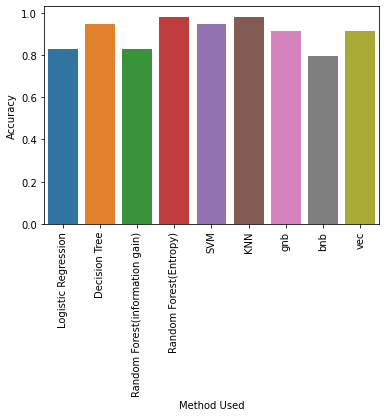

In [ ]:
chart=sns.barplot(x='Method Used',y='Accuracy',data=df_Accuracy)      #bar chart of accuracy data
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
print(chart)

In [ ]:
model_xg=XGBClassifier()  #calling the xgboost model
model_xg.fit(x_train,y_train)

XGBClassifier()

In [ ]:
y_pred=model_xg.predict(x_test)   #making predictions
print(accuracy_score(y_test,y_pred)*100)    #printing the predicted values

98.30508474576271


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,model_xg.predict(x_test))    

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test,model_xg.predict(x_test),average='binary')

0.9859154929577464

In [ ]:
from sklearn.metrics import roc_curve,auc,confusion_matrix,classification_report,accuracy_score
print(classification_report(y_test,model_xg.predict(x_test)))   #shows all evaluation metrics
print('Confusion Matrix')     #for xgboost
print(cm)
#in the confusion matrix- 2 represents false negative and 1 represents false positive
#both the numbers are low, hence the accuracy of xgboost is high

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        24
           1       0.97      1.00      0.99        35

    accuracy                           0.98        59
   macro avg       0.99      0.98      0.98        59
weighted avg       0.98      0.98      0.98        59

Confusion Matrix
[[23  1]
 [ 0 35]]


In [ ]:
for i in list3:         #list 3 contains all the trained algorithms
  print("**************************",i,"**********************************")
  print(classification_report(y_test,i.predict(x_test)))
  print('Confusion Matrix')
  print(confusion_matrix(y_test,i.predict(x_test)))    #Getting the confusion matrix for every algorithm
  print()

************************** LogisticRegression(C=0.4, max_iter=1000, solver='liblinear') **********************************
              precision    recall  f1-score   support

           0       0.75      0.88      0.81        24
           1       0.90      0.80      0.85        35

    accuracy                           0.83        59
   macro avg       0.83      0.84      0.83        59
weighted avg       0.84      0.83      0.83        59

Confusion Matrix
[[21  3]
 [ 7 28]]

************************** DecisionTreeClassifier(random_state=14) **********************************
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        24
           1       0.97      0.94      0.96        35

    accuracy                           0.95        59
   macro avg       0.95      0.95      0.95        59
weighted avg       0.95      0.95      0.95        59

Confusion Matrix
[[23  1]
 [ 2 33]]

************************** RandomForestClassifi

In [ ]:
#Visulaizing performance with ROC
from sklearn.metrics import roc_curve,auc,confusion_matrix,classification_report,accuracy_score
def plot_roc(model,X_test,y_test):
  #calculate the fpr and tpr for all thresholds of classification
  probabilities=model.predict_proba(np.array(X_test))
  predictions=probabilities
  fpr,tpr,threshold=roc_curve(y_test,predictions[:,1])   #fixing the prediction values along with ytest 
  roc_auc=auc(fpr,tpr)   #area under the curve(auc)

  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr,tpr,'b',label='AUC = %0.2f' % roc_auc)
  plt.legend(loc='lower right')
  plt.plot([0,1],[0,1],'r--')
  plt.xlim([0 ,1])
  plt.ylim([0,1])
  plt.ylabel('True Positive Rate')   #y-axis represents true positive rate
  plt.xlabel('False Positive Rate')  #x-axis represents the false positive rate
  plt.show()

In the ROC curve , a curve line will come along with the ideal line. The further away the curve is to the ideal line , the better is the model

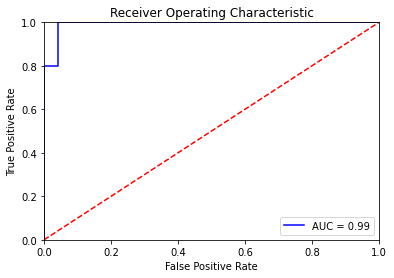

In [ ]:
plot_roc(model_xg,x_test,y_test)
#auc is 1 , hence a good model


---------------------------ROC FOR Logistic Regression + PCA -------------------------


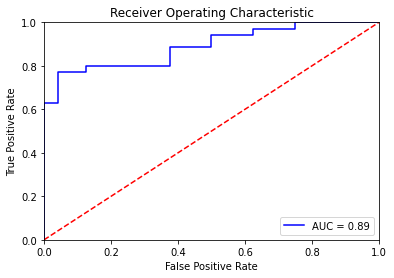



---------------------------ROC FOR Decision Tree + PCA -------------------------


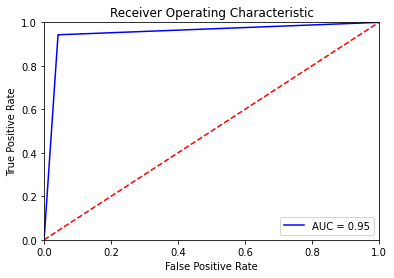



---------------------------ROC FOR Random Forest(information gain) + PCA -------------------------


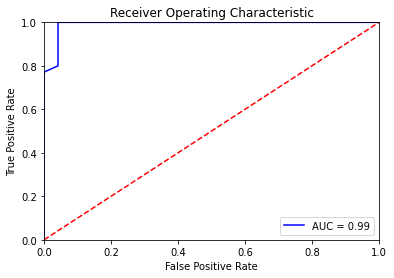



---------------------------ROC FOR Random Forest(Entropy) + PCA -------------------------


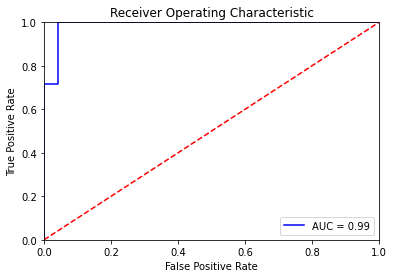



---------------------------ROC FOR SVM + PCA -------------------------
ROC not valid

---------------------------ROC FOR KNN + PCA -------------------------


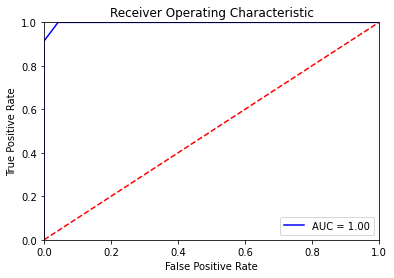



---------------------------ROC FOR gnb + PCA -------------------------


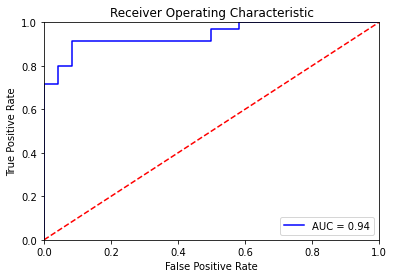



---------------------------ROC FOR bnb + PCA -------------------------


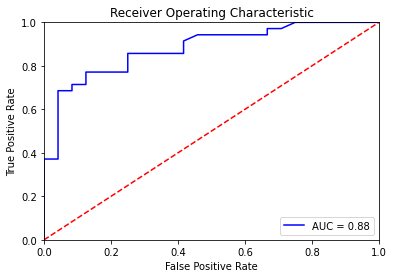

In [ ]:
for i in range(0,len(list3)):   #plotting the roc curves for all the datasets
  try:
    print()
    print("---------------------------ROC FOR",list1[i],"+ PCA -------------------------")
    plot_roc(list3[i],x_test,np.array(y_test))
    print()
  except:
    print("ROC not valid")


In [ ]:
print(pred_final)   #creating a final count for the status values predicted by different algorithms

[1, 1, 1, 1, 1, 1, 0]


In [ ]:
 count=0       #creating a count variable
for i in pred_final:    #intersecting the result gathered from different algorithms to get accurate prediction 
  if(i==0):
    count+=1;
if(count>=5):            #if count goes above 5(for zero values) , then the person does not have  parkinson's disease
  print("The person is not suffering from parkinson's disease")
else:
  print("The person is suffering from parkinson's disease")
  pred_final.clear()

The person is suffering from parkinson's disease
